In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

/Users/digvijay.upadhyay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.10.0


In [3]:
imdb = keras.datasets.imdb

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


In [9]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [10]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [11]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [21]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 ...
 [   1   11    6 ...    0    0    0]
 [   1 1446 7079 ...    0    0    0]
 [   1   17    6 ...    0    0    0]]


In [13]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
# Create validation set
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
print(x_val)
print(partial_x_train)


y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

print(y_val)
print(partial_y_train)

[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 ...
 [   1   14    9 ...    0    0    0]
 [   1   14   20 ...    0    0    0]
 [   1   51  527 ...    0    0    0]]
[[   1   13  104 ...    0    0    0]
 [   1   14   20 ...    0    0    0]
 [   1   86  125 ...    0    0    0]
 ...
 [   1   11    6 ...    0    0    0]
 [   1 1446 7079 ...    0    0    0]
 [   1   17    6 ...    0    0    0]]
[1 0 0 ... 1 0 0]
[0 0 0 ... 0 1 0]


In [16]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 50us/step - loss: 0.6938 - acc: 0.5165 - val_loss: 0.6912 - val_acc: 0.5145
Epoch 2/40
15000/15000 [==============================] - 0s 24us/step - loss: 0.6898 - acc: 0.5297 - val_loss: 0.6887 - val_acc: 0.5377
Epoch 3/40
15000/15000 [==============================] - 0s 25us/step - loss: 0.6869 - acc: 0.5671 - val_loss: 0.6861 - val_acc: 0.5862
Epoch 4/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.6832 - acc: 0.6098 - val_loss: 0.6836 - val_acc: 0.5481
Epoch 5/40
15000/15000 [==============================] - 0s 25us/step - loss: 0.6785 - acc: 0.6470 - val_loss: 0.6770 - val_acc: 0.6626
Epoch 6/40
15000/15000 [==============================] - 0s 30us/step - loss: 0.6715 - acc: 0.6932 - val_loss: 0.6695 - val_acc: 0.6941
Epoch 7/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.6618 - acc: 0.7135 - val_loss: 0.6596 - val_acc

In [17]:
# Evaluate the model
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 0s 17us/step
[0.303631557559967, 0.87728]


In [19]:
# Create graph for acuracy and loss
history_dict = history.history
history_dict.keys()

#dict_keys(['loss', 'val_loss', 'acc', 'val_acc'])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




<Figure size 640x480 with 1 Axes>

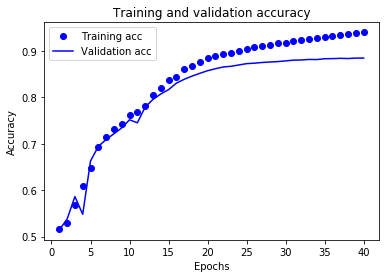

In [20]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()